#### Objective(s):

This activity aims to perform regression analysis using polynomial regression

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build a regression model to predict the outcome using polynomial regression.
* Evaluate the performance of the regression model using polynomial regression

#### Resources:
* Jupyter Notebook
* internet_traffic_hist.csv




#### Procedure:

#### Using numpy polyfit to perform polynomial regression
Import the libraries and the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

Load the dataset

In [ ]:
#importing dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
internet = '/content/drive/My Drive/Colab Notebooks/Datasets/internet_traffic_hist.csv'

df_hist = pd.read_csv(internet)
df_hist.head(11)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


Build the first order polynomial using numpy polyfit




The slope of line is 79.52710966244513.
The y intercept is -159457.12265833947.
The best fit simple linear regression line is 79.52710966244513x + -159457.12265833947.


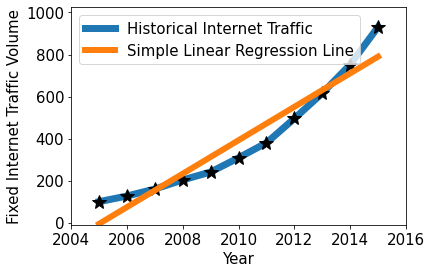

In [ ]:
order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 15})
plt.show()

Build the model using Higher Order Polynomial (1 to 4)


---





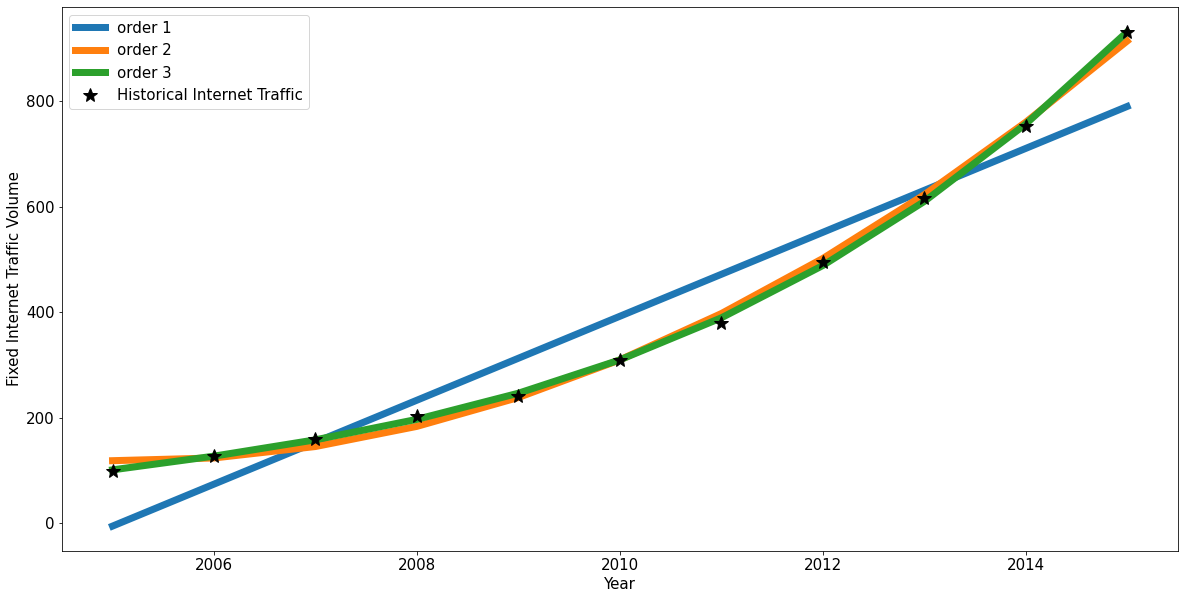

In [ ]:
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

Calculate the error for each order

In [ ]:
# Calculate and store the errors
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse

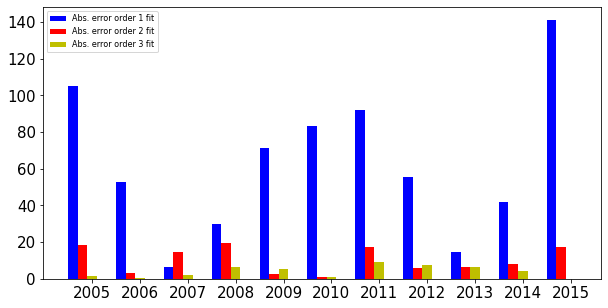

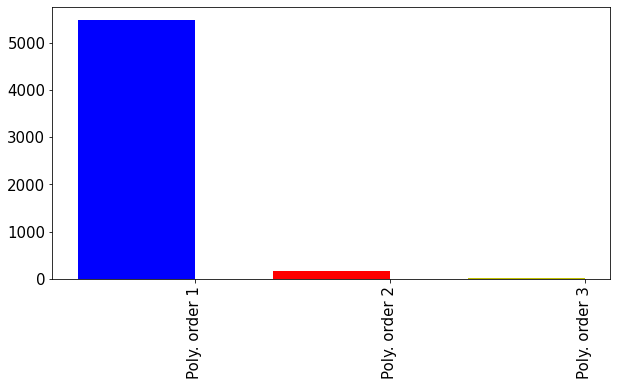

In [ ]:
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =8)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=90)
plt.show()

In [ ]:
# Display fit errors for each year
for i, year in enumerate(df_hist.year):
    print(f"Year: {year}")
    print(f"Order 1 fit error: {errors_hist[0][i]}")
    print(f"Order 2 fit error: {errors_hist[1][i]}")
    print(f"Order 3 fit error: {errors_hist[2][i]}")
    print("")
    
# Display MSE for each model
print("MSE for each model:")
print(f"Order 1 fit: {mse_hist[0]}")
print(f"Order 2 fit: {mse_hist[1]}")
print(f"Order 3 fit: {mse_hist[2]}")


Year: 2005
Order 1 fit error: 105.26778513699537
Order 2 fit error: 18.700083170086145
Order 3 fit error: 1.3074302673339844

Year: 2006
Order 1 fit error: 52.674430747546154
Order 2 fit error: 3.087283419445754
Order 3 fit error: 0.39125264249682346

Year: 2007
Order 1 fit error: 6.5173225280969405
Order 2 fit error: 14.781847073035408
Order 3 fit error: 2.027226927029062

Year: 2008
Order 1 fit error: 29.922940786352285
Order 2 fit error: 19.66420652195751
Order 3 fit error: 6.3298320755356485

Year: 2009
Order 1 fit error: 71.5480875867724
Order 2 fit error: 2.8326333826626637
Order 3 fit error: 5.283944026545157

Year: 2010
Order 1 fit error: 83.5759398852216
Order 2 fit error: 0.9306943605744209
Order 3 fit error: 0.9306980150842037

Year: 2011
Order 1 fit error: 91.91421385567082
Order 2 fit error: 17.533492885479063
Order 3 fit error: 9.416922118463845

Year: 2012
Order 1 fit error: 55.58141438512007
Order 2 fit error: 5.994267071600689
Order 3 fit error: 7.340100814584957

Year

Interpret the result of the fit error for each year




The fit error shows how close the predicted values from a regression model are to the actual observed values. A lower fit error means that the model is doing a better job of predicting the actual values.

Based on the fit error values given for each year, it seems that using a higher order polynomial (order 2 or 3) generally results in a better fit to the data compared to using a lower order polynomial (order 1).

It's also interesting to see that the fit error values can vary a lot from year to year. For example, in 2010, the fit error for the order 2 polynomial is much lower than in other years, which means that the model was particularly good at predicting the data in that year.

In conclusion, looking at the fit error values can help us understand how well a regression model is working for a particular dataset, and can help us choose the best order polynomial to use.

In [ ]:
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
# y = p[0]*x**order + p[1]*x*(order-1) ...

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [ 4.83129404e-01 -2.90500578e+03  5.82252085e+06 -3.89005387e+09]
<class 'numpy.poly1d'>         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The value of the polynomial for x = 2020 is : 2328.5784521102905 
The estimated polynomial parameters are:         3        2
0.4831 x - 2905 x + 5.823e+06 x - 3.89e+09
The errors for each value of x, given the estimated polynomial parameters are: 
 [1.30743027 0.39125264 2.02722693 6.32983208 5.28394403 0.93069802
 9.41692212 7.34010081 6.27729748 4.48133933 0.16291521]
The MSE is :25.17218620372407


#### Using sklearn to perform polynomial regression

Import the necessary libraries

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Training the Polynomial Regression model  using degree 3

In [ ]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x.reshape(-1, 1))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

Predict the result using polynomial regression model

In [ ]:
y_pred = lin_reg.predict(X_poly)


In [ ]:
df = pd.DataFrame({'Real Values': y, 'Predicted Values':y_pred})

In [ ]:
df

,Real Values,Predicted Values
0,100.000000,101.241621
1,126.933755,127.295559
2,160.303757,158.270688
3,203.390603,197.068289
4,241.292566,246.589655
5,308.791823,309.736069
6,379.980659,389.408823
7,495.840568,488.509205
8,616.207252,609.938502
9,752.103483,756.598002


Visualize the Polynomial Regression results

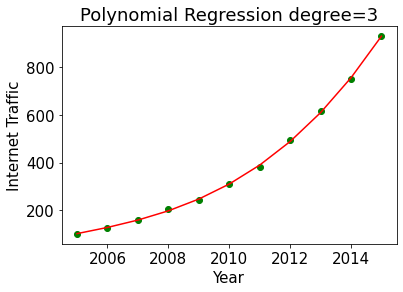

In [ ]:
plt.scatter(x, y, color='green')
plt.plot(x, y_pred, color = 'red')

plt.title("Polynomial Regression degree=3")
plt.xlabel('Year')
plt.ylabel('Internet Traffic')


plt.show();

Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Perform polynomial regression using sklearn and polyfit
* Measure the performance for each polynomial degree.
* Plot the performance of the model for each polynomial degree.


Conclusion:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/Fish.csv'

In [ ]:
fish_df = pd.read_csv(filepath)
fish_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
#Perform polynomial regression using sklearn
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create the feature matrix and target vector
X = fish_df[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = fish_df['Species'].values


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the fish species labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



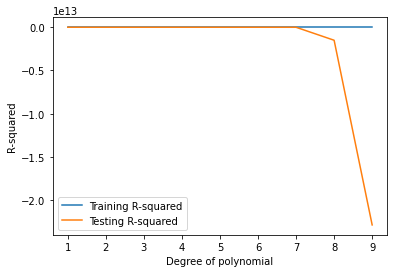

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Calculate the R-squared value for each degree of the polynomial
degrees = range(1, 10)
train_r2 = []
test_r2 = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)

    # Make predictions using the polynomial regression model
    y_train_pred = poly_model.predict(X_poly_train)
    y_test_pred = poly_model.predict(X_poly_test)

    # Calculate the R-squared value for the training and testing sets
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Plot the R-squared values for each degree of the polynomial
plt.plot(degrees, train_r2, label='Training R-squared')
plt.plot(degrees, test_r2, label='Testing R-squared')
plt.xlabel('Degree of polynomial')
plt.ylabel('R-squared')
plt.legend()
plt.show()

In [ ]:
# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_encoded)

# Make predictions using the polynomial regression model
y_pred = poly_model.predict(X_poly)


In [ ]:
y_pred

array([-0.11634361, -0.81789106,  0.53941665,  0.49110209,  1.29256154,
        0.14022828,  0.60625911,  0.55776067, -0.36118576, -0.82917852,
       -0.17364795, -0.51986354, -0.07966374, -0.34426671, -0.12578816,
        0.02592714,  0.57313269,  0.01645879, -0.51797676,  1.56343764,
        0.06321009, -0.39401426, -0.12315441,  1.09092807, -0.47636834,
       -0.35418613,  0.19004978, -0.04720094,  0.4925587 , -0.90830307,
       -0.14619031, -0.07096948, -0.35752391,  0.64579533,  0.6489686 ,
        4.47387284,  3.59275381,  3.92361063,  3.88631255,  3.64510251,
        2.87848224,  3.60320458,  3.9951061 ,  4.32016612,  3.6552774 ,
        3.76725508,  3.83281505,  4.05794753,  3.59661671,  3.90989066,
        3.93443016,  3.96402634,  3.84996041,  3.82038213,  4.21053107,
        3.65715575,  3.91548514,  3.86755645,  4.30175549,  4.57454672,
        4.48696067,  0.99829472,  1.68218281,  1.59056532,  1.18738985,
        1.34256974,  1.83569744,  1.10790844,  0.58598339,  1.12

In [ ]:
# Clip the predicted labels to be within the range of the label encoder's classes
y_pred_clipped = np.clip(y_pred, 0, len(label_encoder.classes_)-1)

# Inverse transform the clipped predicted labels
y_pred_species = label_encoder.inverse_transform(y_pred_clipped.astype(int))


In [ ]:
y_pred_species

array(['Bream', 'Bream', 'Bream', 'Bream', 'Parkki', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Parkki', 'Bream',
       'Bream', 'Bream', 'Parkki', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Pike', 'Pike', 'Pike', 'Pike', 'Perch', 'Pike', 'Pike',
       'Roach', 'Pike', 'Pike', 'Pike', 'Roach', 'Pike', 'Pike', 'Pike',
       'Pike', 'Pike', 'Pike', 'Roach', 'Pike', 'Pike', 'Pike', 'Roach',
       'Roach', 'Roach', 'Bream', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Bream', 'Parkki', 'Parkki', 'Parkki', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Bream', 'Parkki',
       'Perch', 'Parkki', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Parkki', 'Perch',
       'Pike', 'Perch', 'Parkki', 'Perch', 'Perch', 'Perch', 'Perc